In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob 
import cv2
import re
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array
# from PIL import Image
import skimage.io as io

# keras.preprocessing.imageのImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
tf.test.gpu_device_name() 

'/device:GPU:0'

## 問題１　学習・推定

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pwd

'/content'

In [8]:
ls

 コンペ/                           EstateAnalytics/             train/
'Colab Notebooks'/                 sp14.Keras/                  Unet/
 DartsProblem_OptionalTask.ipynb   sp8.EnsembleLearning.ipynb   模範解答/


In [7]:
cd MyDrive/

/content/drive/MyDrive


In [11]:
!unzip Unet/train.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: __MACOSX/train/images/._34831dcd0c.png  
  inflating: train/images/a41357f553.png  
  inflating: __MACOSX/train/images/._a41357f553.png  
  inflating: train/images/5f51a19f9e.png  
  inflating: __MACOSX/train/images/._5f51a19f9e.png  
  inflating: train/images/1f50bc7a9f.png  
  inflating: __MACOSX/train/images/._1f50bc7a9f.png  
  inflating: train/images/62715133c5.png  
  inflating: __MACOSX/train/images/._62715133c5.png  
  inflating: train/images/f503aaf699.png  
  inflating: __MACOSX/train/images/._f503aaf699.png  
  inflating: train/images/5a6f57c150.png  
  inflating: __MACOSX/train/images/._5a6f57c150.png  
  inflating: train/images/4b9862566c.png  
  inflating: __MACOSX/train/images/._4b9862566c.png  
  inflating: train/images/5df9874c5b.png  
  inflating: __MACOSX/train/images/._5df9874c5b.png  
  inflating: train/images/7c6f76a267.png  
  inflating: __MACOSX/train/images/._7c6f76a267.png  
  inflating: train/images/065ce5590e.png 

In [83]:
ls

In [15]:
!unzip Unet/unet-master.zip

Archive:  Unet/unet-master.zip
b45af4d458437d8281cc218a07fd4380818ece4a
   creating: unet-master/
  inflating: unet-master/LICENSE     
  inflating: unet-master/README.md   
  inflating: unet-master/data.py     
   creating: unet-master/data/
   creating: unet-master/data/membrane/
  inflating: unet-master/data/membrane/test-volume.tif  
   creating: unet-master/data/membrane/test/
 extracting: unet-master/data/membrane/test/0.png  
 extracting: unet-master/data/membrane/test/0_predict.png  
 extracting: unet-master/data/membrane/test/1.png  
 extracting: unet-master/data/membrane/test/10.png  
 extracting: unet-master/data/membrane/test/10_predict.png  
 extracting: unet-master/data/membrane/test/11.png  
 extracting: unet-master/data/membrane/test/11_predict.png  
 extracting: unet-master/data/membrane/test/12.png  
 extracting: unet-master/data/membrane/test/12_predict.png  
 extracting: unet-master/data/membrane/test/13.png  
 extracting: unet-master/data/membrane/test/13_predict.p

In [65]:
# train = pd.read_csv('train.csv')

In [29]:
img_list = glob.glob(r'Unet/train/images/*')
masks_list = glob.glob(r'Unet/train/masks/*')
img_list[:5]
masks_list[:5]

['Unet/train/masks/403cb8f4b3.png',
 'Unet/train/masks/ce1f9711bc.png',
 'Unet/train/masks/24c102ca1f.png',
 'Unet/train/masks/87725b728a.png',
 'Unet/train/masks/6c4568e51c.png']

In [32]:
img_box = []
masks_box = []
for i in range(len(img_list)):
    a=img_list[i].split('/')
    b=masks_list[i].split('/')
    img_box.append(a[3])
    masks_box.append(b[3])

img_box[:3]
masks_box[:3]

['403cb8f4b3.png', 'ce1f9711bc.png', '24c102ca1f.png']

0


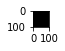

1


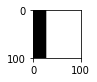

2


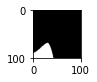

3


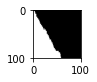

4


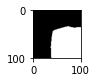

In [33]:
# 可視化したいけど上手くできない
plt.figure(figsize=(2,6))
for j, img_name in enumerate(img_box[:5]):
    q = j+1
    img = load_img('train/images/' + img_box[j])
    img_mask = load_img('train/masks/' + img_box[j])
    print(j)
    plt.subplot(1,6,q)
    plt.imshow(img)
    # plt.show()
    # plt.subplot(1,2*(len(img_list)),q*2)
    plt.subplot(2,6,q)
    plt.imshow(img_mask)
    plt.show() 

In [19]:
!python unet-master/main.py

2021-09-11 12:10:09.397269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-11 12:10:09.407726: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-11 12:10:09.408945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-11 12:10:09.410616: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-11 12:10:09.411625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [21]:
## インポート
import os
import sys
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, BatchNormalization, Activation, Dense, Dropout, MaxPooling2D, GlobalMaxPool2D, Conv2D, Conv2DTranspose, concatenate, add
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
## シードする
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

In [22]:
#画像の形式を変換する
#下のget_image()メゾッドで使う
def load_image(img_path, show=False):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128,128))
    img_tensor = img_to_array(img)                   
    #img_tensor = np.expand_dims(img_tensor, axis=0)         

    return img_tensor

In [46]:
# インポートしてきた画像を渡して変換してlistで返す
def get_image(path):
    data =[]
    for subdir, dirs, files in os.walk(path):
        for f in files:
            path = os.path.join(subdir, f)
            img = load_image(path)     
            print(img.shape)
            img = img/255.0
            data.append(img)
    return data

X = get_image(r'Unet/train/images/')
y = get_image(r'Unet/train/masks/')

ストリーミング出力は最後の 5000 行に切り捨てられました。
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(1

In [53]:
x = np.asarray(X)#代入する変数名が変わればnp.array()で変換してもよい
y = np.asarray(y)

In [54]:
#　データの分割
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, random_state=42)

print(x.shape)
print(y.shape)

(4000, 128, 128, 1)
(4000, 128, 128, 1)


Text(0.5, 1.0, 'Salt')

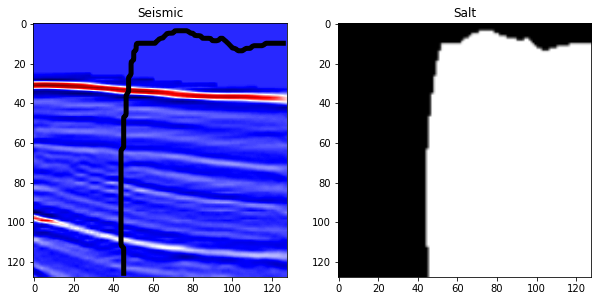

In [61]:
# imagesデータとmasksデータを可視化する
ix = random.randint(0, len(X_train))
has_mask = y_train[ix].max() > 0 # salt indicator

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.imshow(X_train[ix, ..., 0], cmap = 'seismic', interpolation = 'bilinear')
if has_mask: # if salt
    # 塩分と非塩分を分離する元の画像に境界線を描画
    ax1.contour(y_train[ix].squeeze(), colors = 'k', linewidths = 5, levels = [0.5])
ax1.set_title('Seismic')

ax2.imshow(y_train[ix].squeeze(), cmap = 'gray', interpolation = 'bilinear')
ax2.set_title('Salt')

In [62]:
# Unetモデルを作成
def UNet(input_img):

    c1 = Conv2D(16, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(input_img)
    c1 = BatchNormalization()(c1)
    c1 = Activation('relu')(c1)
    
    c1 = Conv2D(16, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(c1)
    c1 = BatchNormalization()(c1)
    c1 = Activation('relu')(c1)
    
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(0.1)(p1)
#-----------------------------------------------------------------------------------------------------------------    
    
    c2 = Conv2D(32, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = Activation('relu')(c2)
    
    c2 = Conv2D(32, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(c2)
    c2 = BatchNormalization()(c2)
    c2 = Activation('relu')(c2)
    
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(0.1)(p2) 
#-----------------------------------------------------------------------------------------------------------------    
    
    c3 = Conv2D(64, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = Activation('relu')(c3)
    
    c3 = Conv2D(64, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(c3)
    c3 = BatchNormalization()(c3)
    c3 = Activation('relu')(c3)
    
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(0.1)(p3) 
    
#-----------------------------------------------------------------------------------------------------------------    
    
    c4 = Conv2D(128, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(p3)
    c4 = BatchNormalization()(c4)
    c4 = Activation('relu')(c4)
    
    c4 = Conv2D(128, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(c4)
    c4 = BatchNormalization()(c4)
    c4 = Activation('relu')(c4)
    
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(0.1)(p4) 
    
#-----------------------------------------------------------------------------------------------------------------    
    
    c5 = Conv2D(256, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(p4)
    c5 = BatchNormalization()(c5)
    c5 = Activation('relu')(c5)
    
    c5 = Conv2D(256, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(c5)
    c5 = BatchNormalization()(c5)
    c5 = Activation('relu')(c5)
    
#------UMSAMPLE STARTS---------------------------------------------------------------------------------------------

    u6 = Conv2DTranspose(128, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(0.1)(u6)
    
    c6 = Conv2D(128, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(u6)
    c6 = BatchNormalization()(c6)
    c6 = Activation('relu')(c6)
    
    c6 = Conv2D(128, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(c6)
    c6 = BatchNormalization()(c6)
    c6 = Activation('relu')(c6)
    
#---------------------------------------------------------------------------------------------------

    u7 = Conv2DTranspose(64, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(0.1)(u7)
    
    c7 = Conv2D(64, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = Activation('relu')(c7)
    
    c7 = Conv2D(64, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(c7)
    c7 = BatchNormalization()(c7)
    c7 = Activation('relu')(c7)
    
#---------------------------------------------------------------------------------------------------

    u8 = Conv2DTranspose(32, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(0.1)(u8)
    
    c8 = Conv2D(32, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(u8)
    c8 = BatchNormalization()(c8)
    c8 = Activation('relu')(c8)

    c8 = Conv2D(32, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(c8)
    c8 = BatchNormalization()(c8)
    c8 = Activation('relu')(c8)
    
#---------------------------------------------------------------------------------------------------

    u9 = Conv2DTranspose(16, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(0.1)(u9)
    
    c9 = Conv2D(16, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(u9)
    c9 = BatchNormalization()(c9)
    c9 = Activation('relu')(c9)
    
    c9 = Conv2D(16, kernel_size = (3,3), kernel_initializer = 'he_normal', padding = 'same')(c9)
    c9 = BatchNormalization()(c9)
    c9 = Activation('relu')(c9)
    
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(input_img, outputs)
    return model

In [63]:
input_img = Input((128, 128, 1), name='img')
# input_imgを引数に渡してインスタンス化
model = UNet(input_img)

model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 160         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [64]:
# trainデータとvalデータどちらも推定
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_valid, verbose=1)

13/13 [==============================] - 1s 77ms/step


In [65]:
# しきい値の推定
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [66]:
# 特徴量と目的変数、推定したデータを入れて可視化する関数
def plot_sample(X, y, preds, binary_preds):
    ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    #X[ix, ..., 0] をprintするとサイズが変わることがわかる
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Seismic')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Salt')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Salt Predicted')
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Salt Predicted binary');

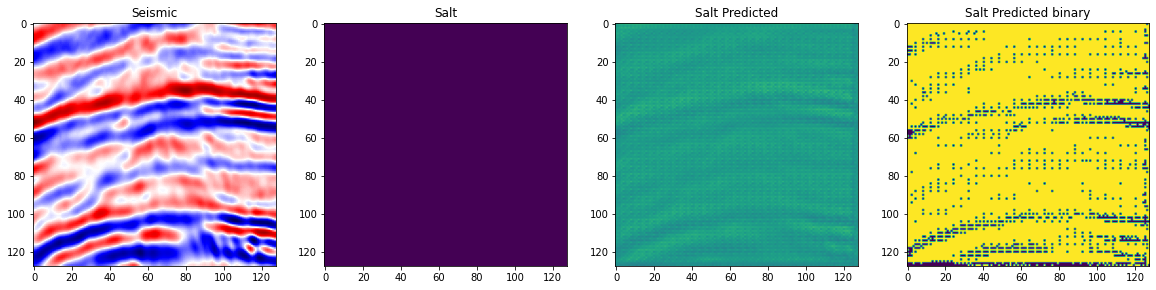

In [71]:
plot_sample(X_train, y_train, preds_train, preds_train_t)

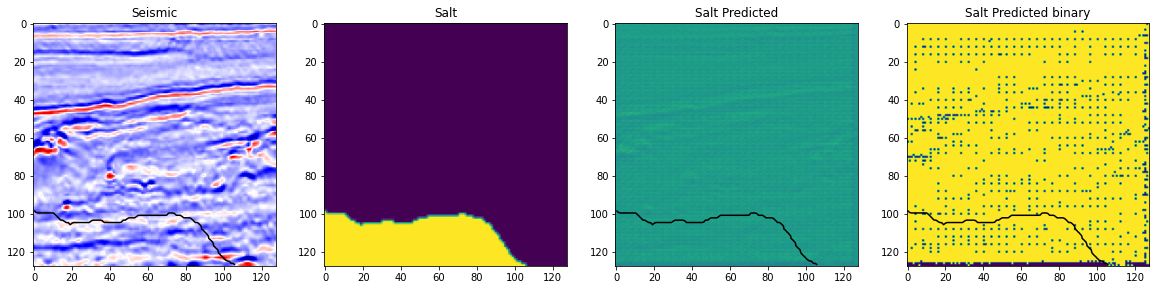

In [72]:
plot_sample(X_train, y_train, preds_train, preds_train_t)

## 【問題2】コードリーディング

論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

・model.pyのデータをもとに上記モデルを作成


・４層まではmaxpool。upconvに置き換えることで通常の収縮ネットワークを連続したレイヤーで補完＝出力の解像度を向上させる



・特徴量のチャンネル数を2倍にするアップサンプリング、2×2コンボリューションでチャンネル数を半分にする実装をUnetモデルの中で行っている


・outputにシグモイド関数